In [1]:
import warnings
warnings.filterwarnings("ignore")

# statsmodels for arima
from statsmodels.tsa.api import ARIMA, seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# data ingestion
from src.dataset.data_ingestion import DataIngestion

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn metrics
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, r2_score
import pandas as pd

# helper function
from helpers.ts_helper import test_stationary
SERIES_IDS = "DEXUSEU"

data = DataIngestion(SERIES_IDS).fetch_data()

data.head(10)

,DEXUSEU,date
0,1.1812,1999-01-04
1,1.1760,1999-01-05
2,1.1636,1999-01-06
3,1.1672,1999-01-07
4,1.1554,1999-01-08
5,1.1534,1999-01-11
6,1.1548,1999-01-12
7,1.1698,1999-01-13
8,1.1689,1999-01-14
9,1.1591,1999-01-15


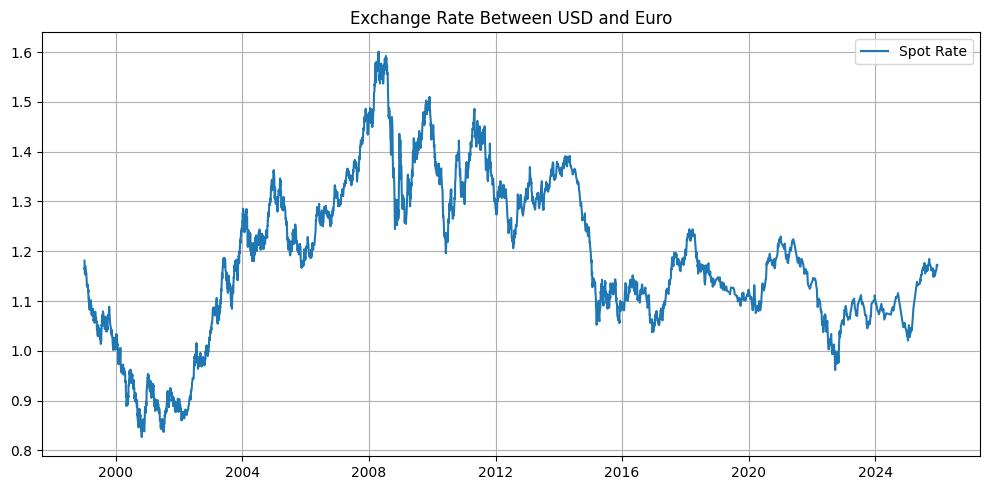

In [2]:
#to datetime
df = data.copy()

df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

plt.figure(figsize=(10,5))
plt.plot(df,label="Spot Rate")
plt.title("Exchange Rate Between USD and Euro")
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()



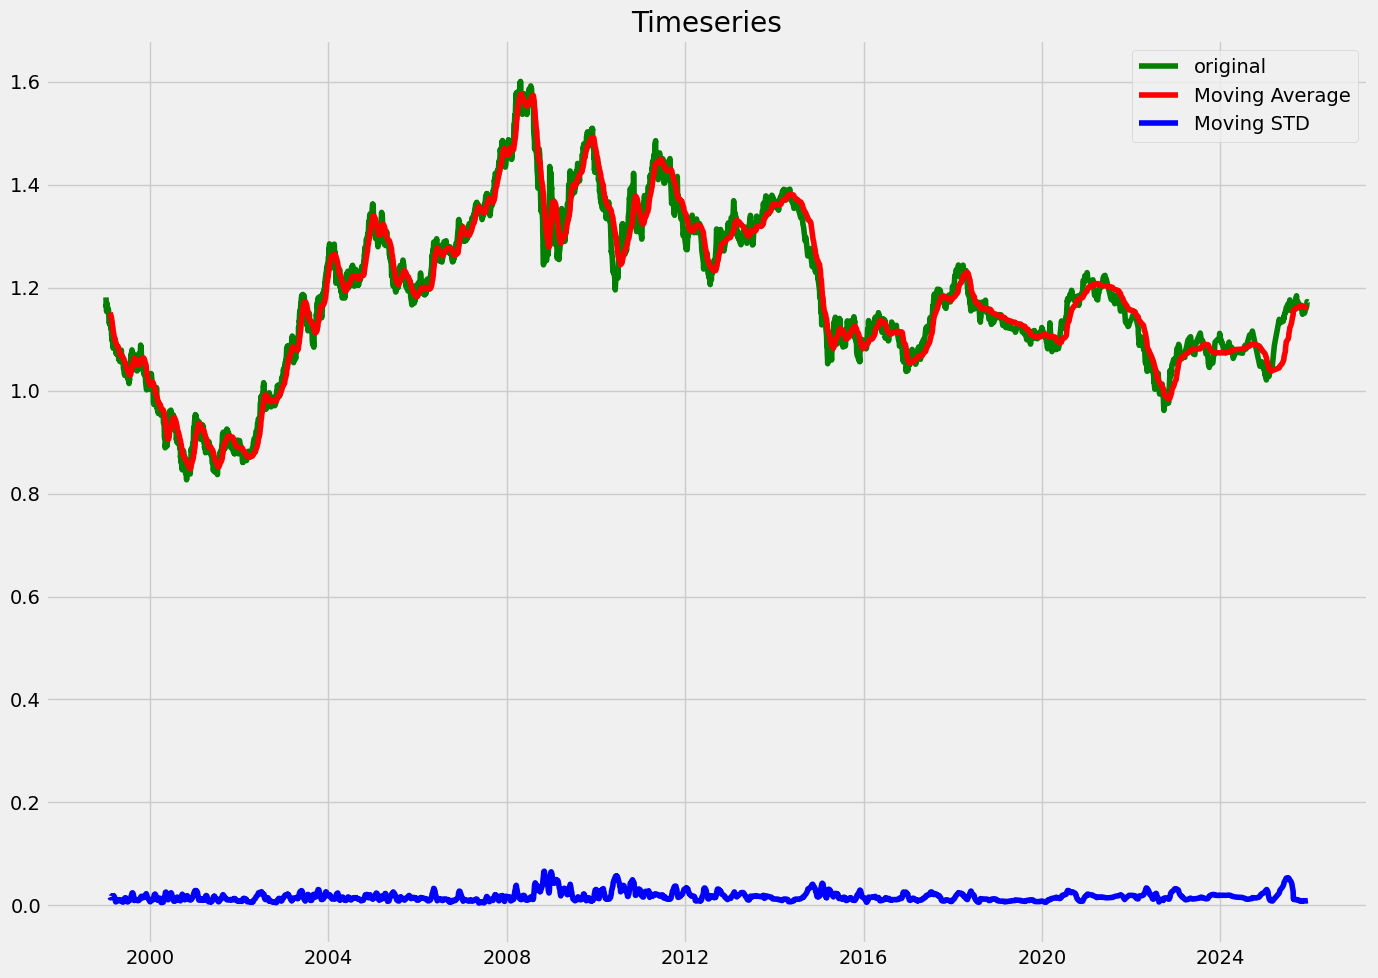


Results from Fueller Tests

Test Statistic                   -1.647344
p-value                           0.458426
'#Lags Used                       0.000000
Number of Observations Used    3787.000000
Critical Value (1%)              -3.432078
Critical Value (5%)              -2.862304
Critical Value (10%)             -2.567176
dtype: float64
P-Value
0.4584261861152086

Lags Used

0


In [3]:
#stationary test of original data
test_stationary(df)


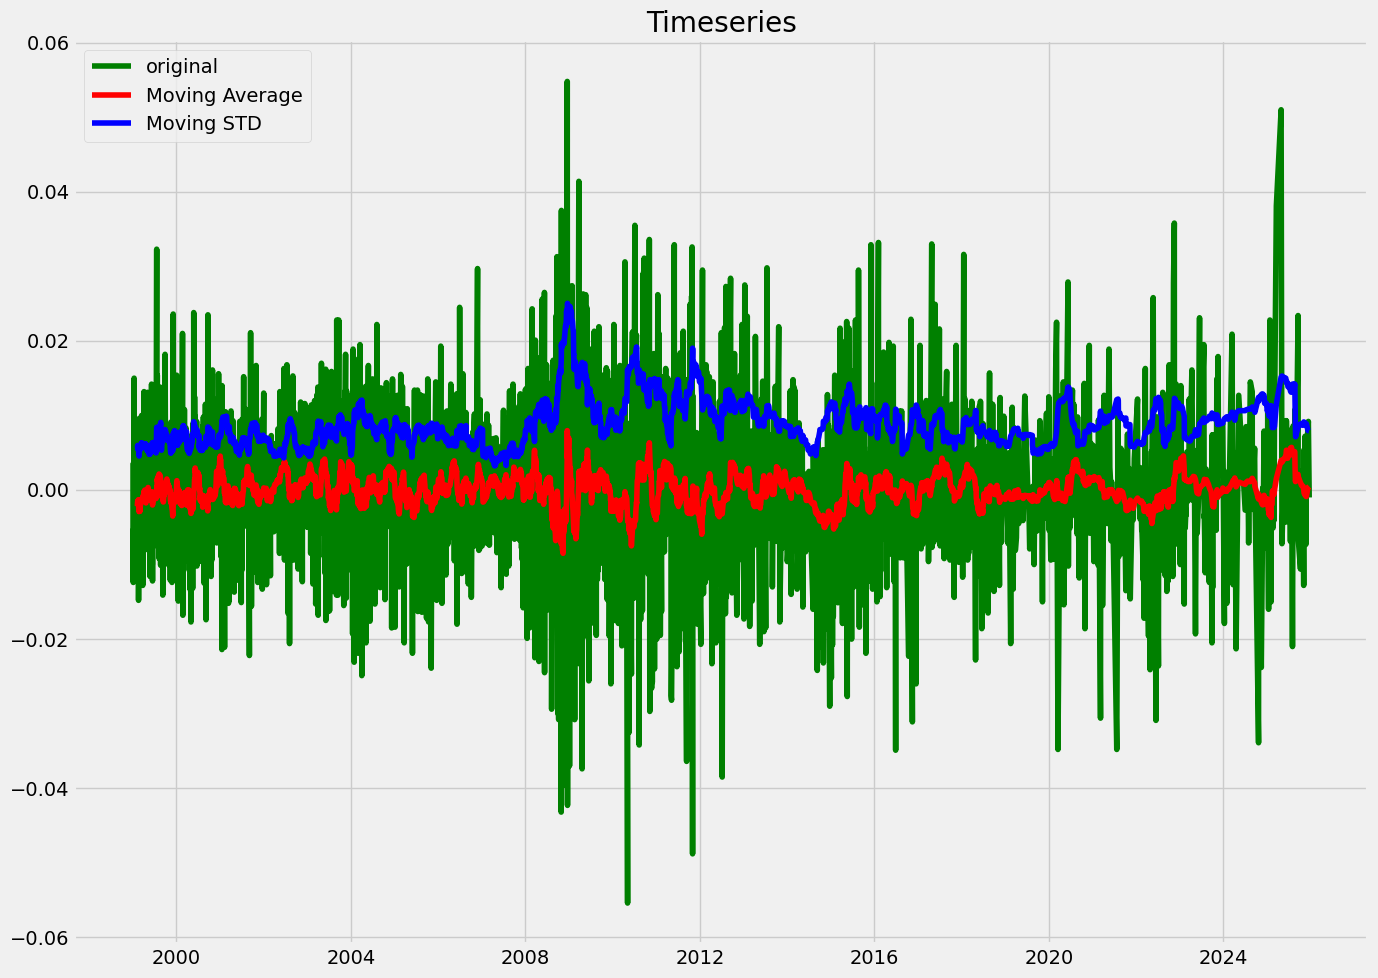


Results from Fueller Tests

Test Statistic                  -61.617229
p-value                           0.000000
'#Lags Used                       0.000000
Number of Observations Used    3786.000000
Critical Value (1%)              -3.432078
Critical Value (5%)              -2.862304
Critical Value (10%)             -2.567177
dtype: float64
P-Value
0.0

Lags Used

0


In [4]:
#first-order differencing adfueller test.

df_diff = df.diff().dropna()
test_stationary(df_diff)




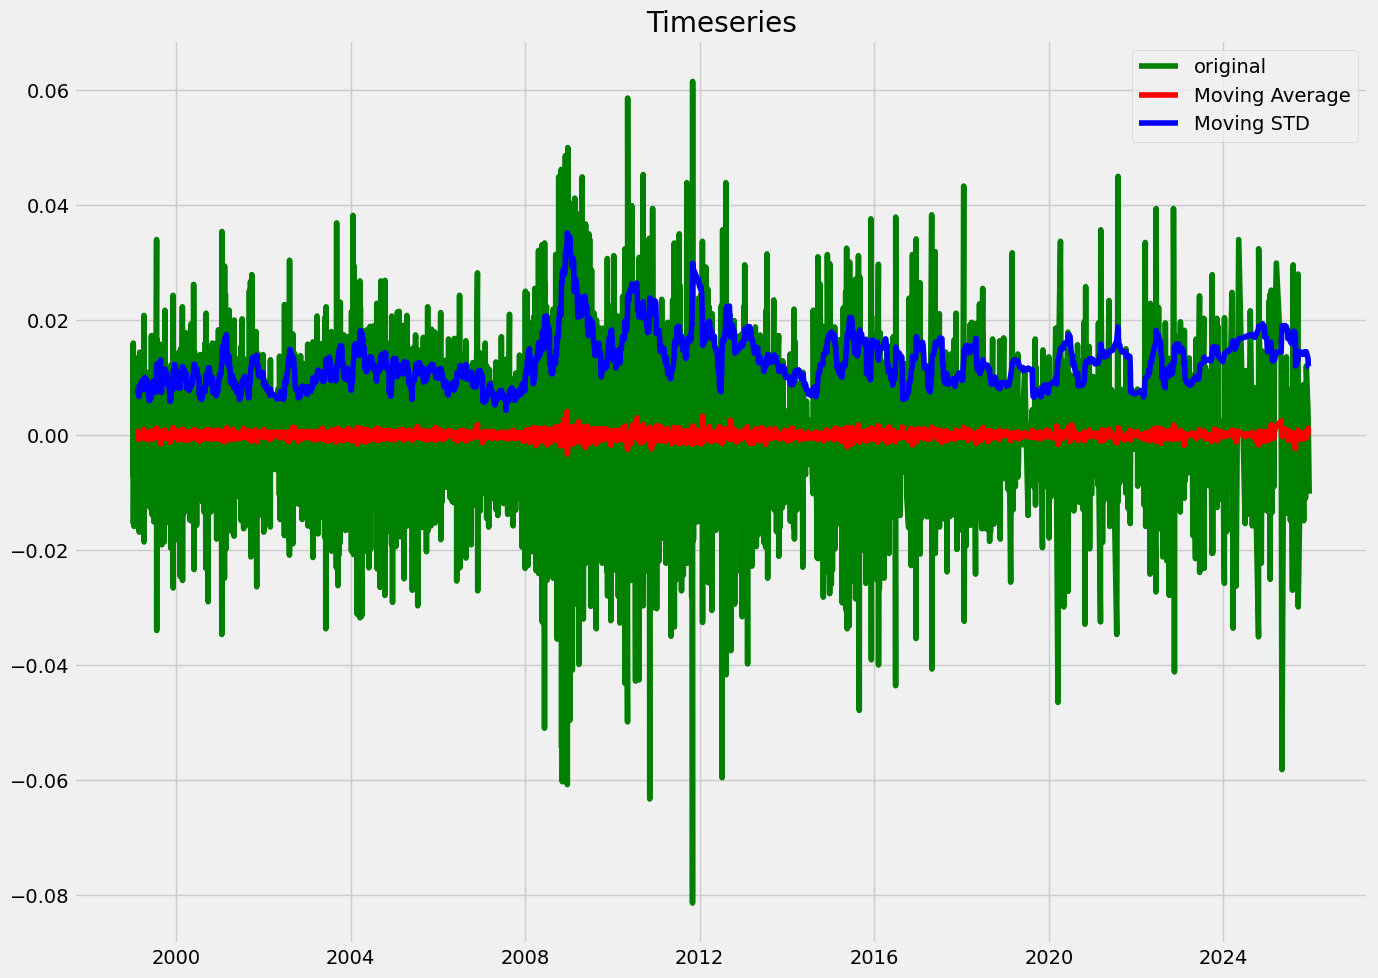


Results from Fueller Tests

Test Statistic                  -19.960013
p-value                           0.000000
'#Lags Used                      28.000000
Number of Observations Used    3757.000000
Critical Value (1%)              -3.432092
Critical Value (5%)              -2.862310
Critical Value (10%)             -2.567180
dtype: float64
P-Value
0.0

Lags Used

28


In [5]:
# second-order differencing test
df_diff_diff = df.diff().diff().dropna()
test_stationary(df_diff_diff)

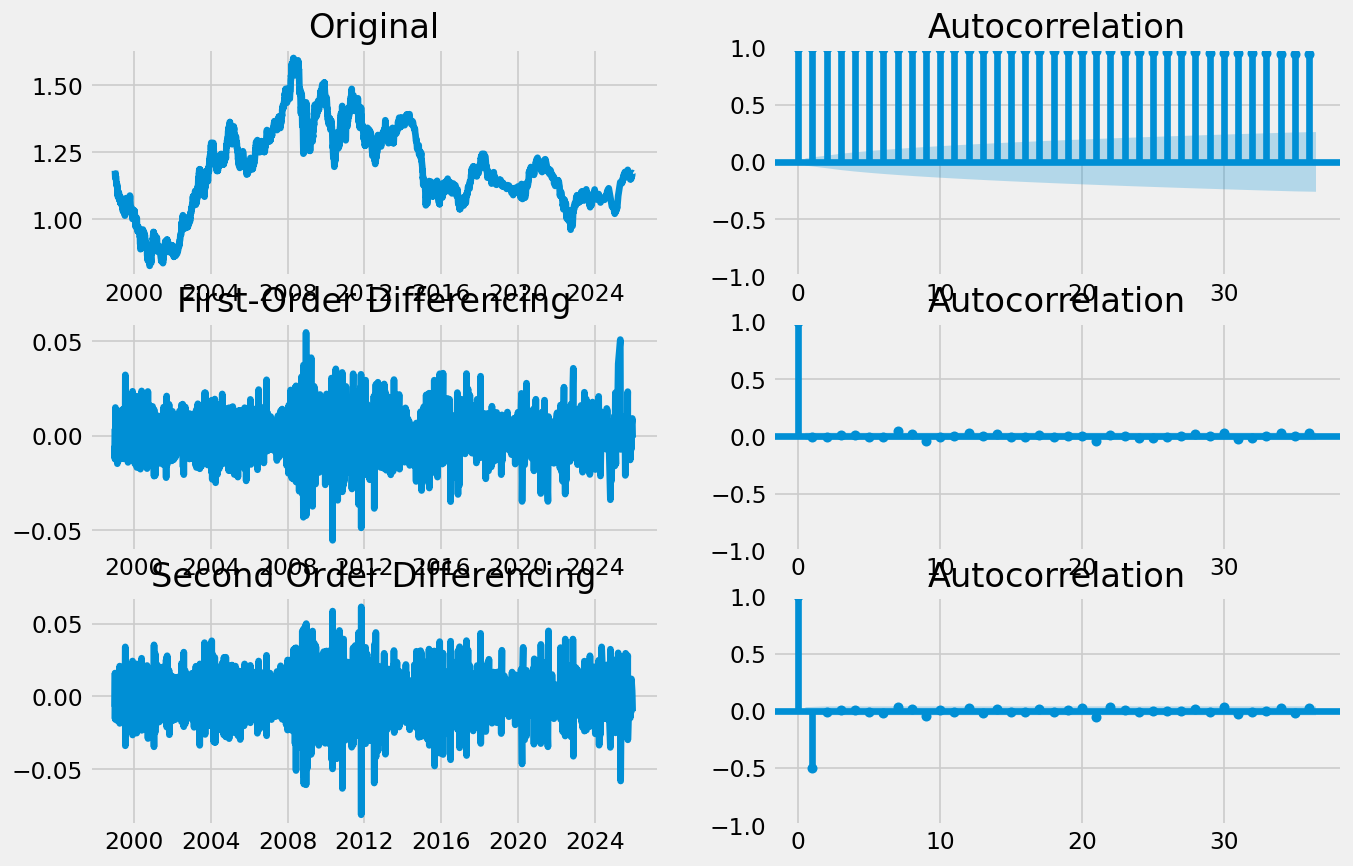

In [6]:
# acf, and pacf

plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':120})
fig,axs = plt.subplots(3,2)
# original data points
axs[0,0].plot(df);axs[0,0].set_title("Original")
plot_acf(df,ax=axs[0,1])

# first-order differencing
axs[1,0].plot(df.diff().dropna());axs[1,0].set_title("First-Order Differencing")
plot_acf(df.diff().dropna(),ax=axs[1,1])

# second-order Differencing
axs[2,0].plot(df.diff().diff().dropna());axs[2,0].set_title("Second Order Differencing")
plot_acf(df.diff().diff().dropna(),ax=axs[2,1])
plt.show()



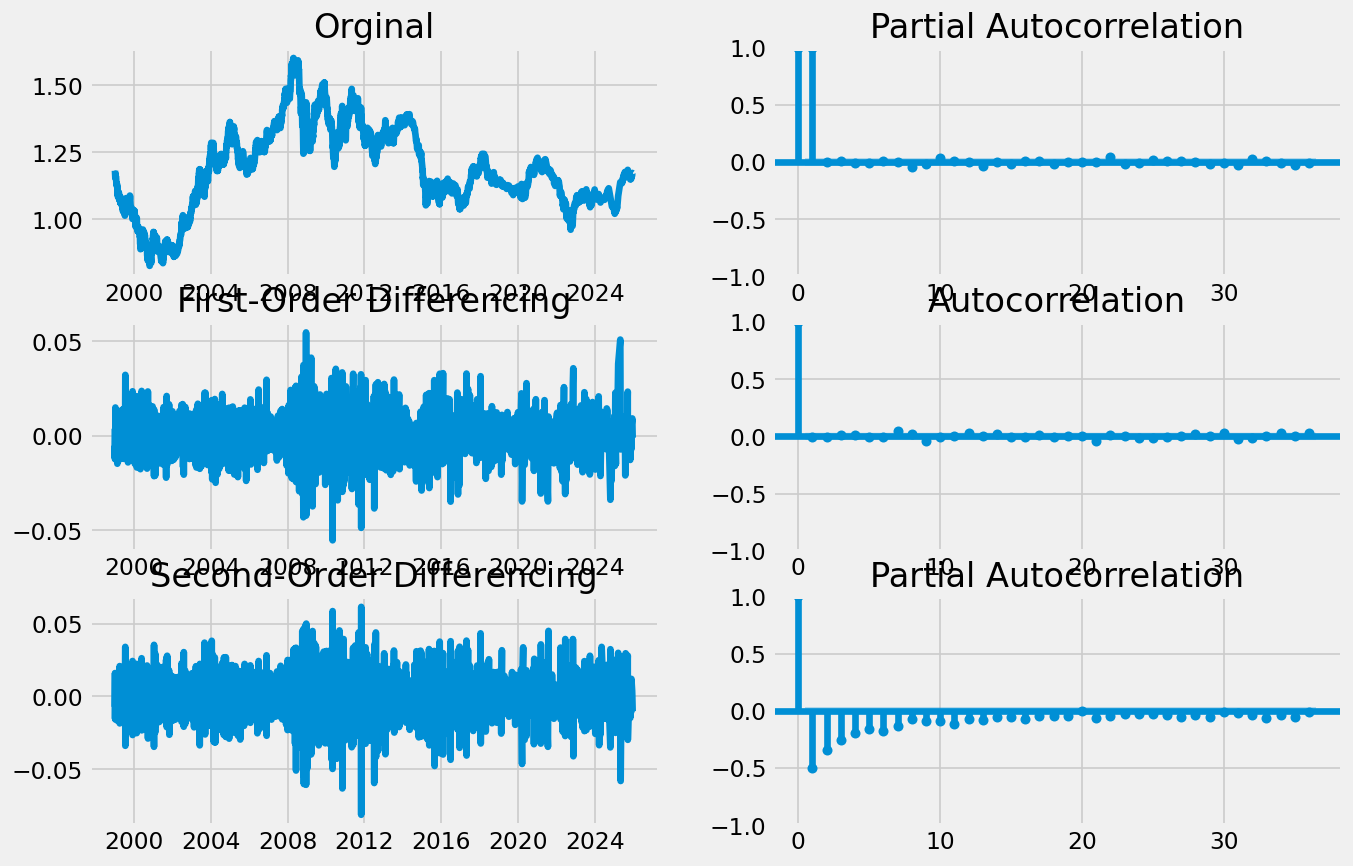

In [7]:
# pacf

fig,axs = plt.subplots(3,2)
axs[0,0].plot(df);axs[0,0].set_title("Orginal")
plot_pacf(df,ax=axs[0,1])

# first-order differencing
axs[1,0].plot(df.diff().dropna());axs[1,0].set_title("First-Order Differencing")
plot_acf(df.diff().dropna(),ax=axs[1,1])


# Second-Order Differencing
axs[2,0].plot(df.diff().diff().dropna());axs[2,0].set_title("Second-Order Differencing")
plot_pacf(df.diff().diff().dropna(),ax=axs[2,1])
plt.show()



In [8]:
#arima order=(1,0,0)

model = ARIMA(df,order=(1,0,0))
model_fitted = model.fit()
model_fitted.summary()

/home/nick/Spot-Rate-Forecasting/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nick/Spot-Rate-Forecasting/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nick/Spot-Rate-Forecasting/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                DEXUSEU   No. Observations:                 3788
Model:                 ARIMA(1, 0, 0)   Log Likelihood               12354.596
Date:                Wed, 31 Dec 2025   AIC                         -24703.192
Time:                        14:22:30   BIC                         -24684.473
Sample:                             0   HQIC                        -24696.538
                               - 3788                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1903      0.108     10.990      0.000       0.978       1.403
ar.L1          0.9986      0.001   1130.537      0.000       0.997       1.000
sigma2      8.589e-05   1.28e-06     67.098      0.000    8.34e-05    8.84e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1231.77
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

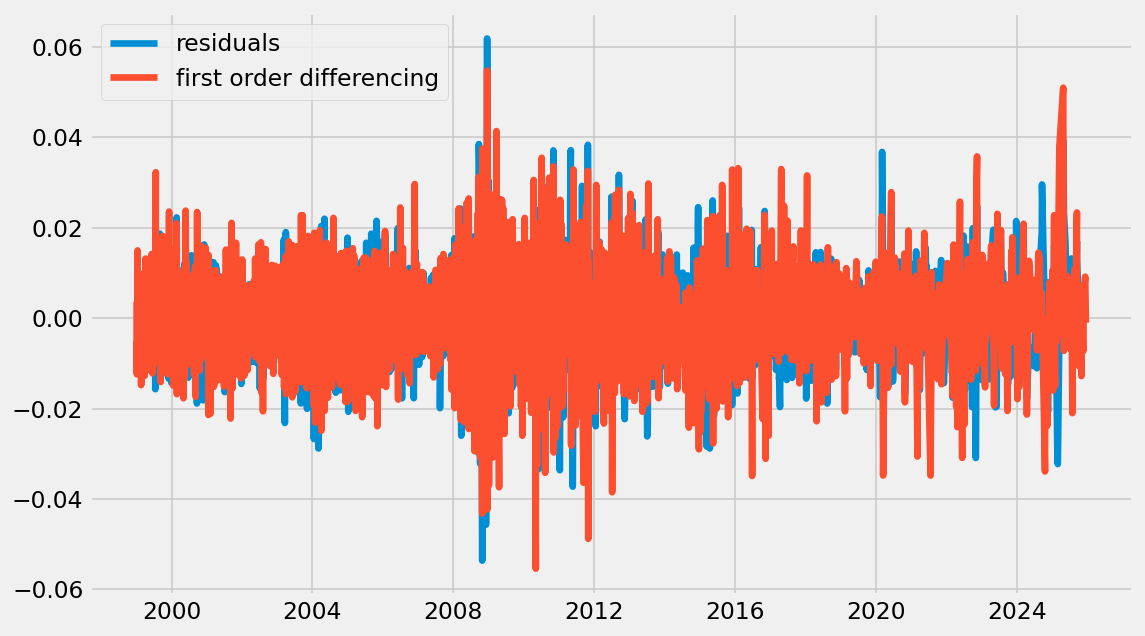

In [9]:
#seasonal decompose
decompose = seasonal_decompose(x=df,period=12)


plt.figure(figsize=(10,6))
plt.plot(decompose.resid,label="residuals")
plt.plot(df_diff,label="first order differencing")
plt.legend()
plt.show()

/home/nick/Spot-Rate-Forecasting/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


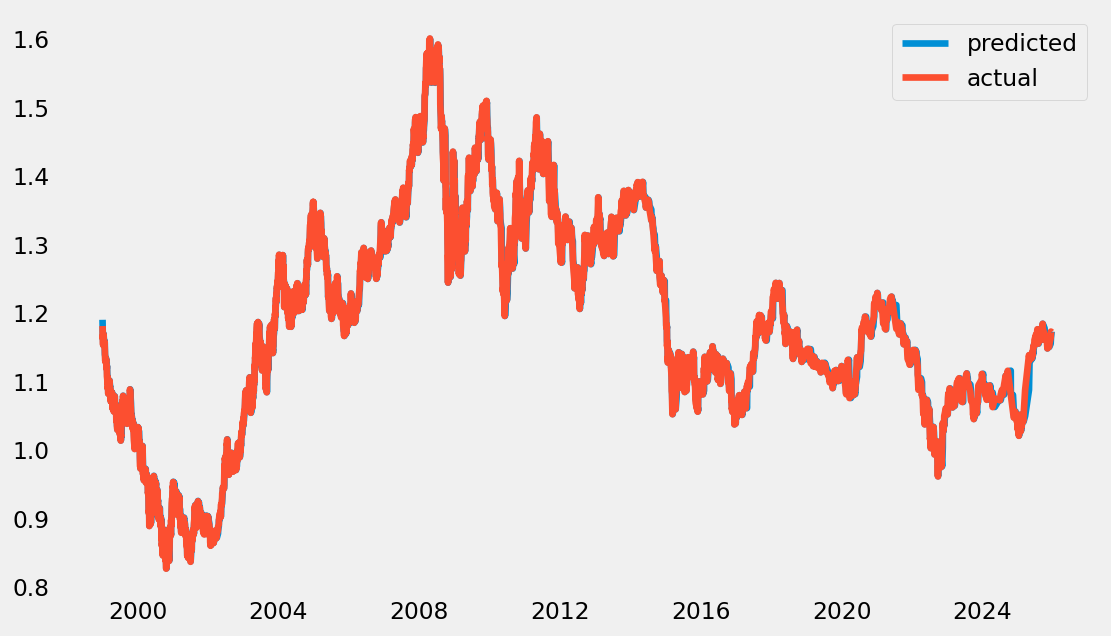

In [10]:

df['predicted'] = model_fitted.fittedvalues
forecast = model_fitted.forecast(steps=24)
plt.figure(figsize=(10,6))
plt.plot(df['predicted'],label="predicted")
plt.plot(df['DEXUSEU'],label="actual")
plt.legend()
plt.grid()
plt.show()




In [11]:
#metrics

# r2 score
r2 = r2_score(df['predicted'], df['DEXUSEU'])
print(f"R2 score: {r2*100:.2f}")

#mean absolute error
mae = mean_absolute_error(df['predicted'],df['DEXUSEU'])
print(f"Mean Absolute Value: {mae:.4}")

#mean absolute percentage error
mape = mean_absolute_percentage_error(df['predicted'],df['DEXUSEU'])
print(f"mean absolute percentage error: {mape:4}")

#root mean squared error
rmse = mean_squared_error(df['predicted'],df['DEXUSEU'])
print(f"Mean squared error: {rmse:.4}")



R2 score: 99.71
Mean Absolute Value: 0.006743
mean absolute percentage error: 0.005688793221443956
Mean squared error: 8.591e-05


In [12]:
#actual vs predicted

print(f"Predicted: {df['predicted'].tail(20)}")
print(f"Actual values: {df['DEXUSEU']}")

Predicted: date
2025-08-26    1.171327
2025-08-27    1.165735
2025-09-17    1.161142
2025-09-18    1.184508
2025-10-07    1.178018
2025-10-10    1.167433
2025-10-15    1.161342
2025-10-28    1.163838
2025-11-03    1.165935
2025-11-04    1.153153
2025-11-05    1.149159
2025-11-06    1.148560
2025-11-10    1.153952
2025-11-14    1.154551
2025-11-18    1.161741
2025-11-21    1.157946
2025-11-25    1.150657
2025-12-09    1.155350
2025-12-12    1.163938
2025-12-19    1.173125
Name: predicted, dtype: float64
Actual values: date
1999-01-04    1.1812
1999-01-05    1.1760
1999-01-06    1.1636
1999-01-07    1.1672
1999-01-08    1.1554
               ...  
2025-11-21    1.1506
2025-11-25    1.1553
2025-12-09    1.1639
2025-12-12    1.1731
2025-12-19    1.1721
Name: DEXUSEU, Length: 3788, dtype: float64
